# Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [116]:
df = pd.read_csv("Churn_Modelling.csv")

In [117]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [129]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df['Exited']


In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [133]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
import keras #Keras is the wrapper on the top of tenserflow
#Can use Tenserflow as well but won't be able to understand the errors initially. 

In [135]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [136]:
classifier = Sequential()

In [137]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "relu",input_dim = 8,units = 6,kernel_initializer = "uniform")) 

In [138]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [139]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

In [140]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [141]:
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [142]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 0.4991 - accuracy: 0.7950
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.7950
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.7950
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8141
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8223
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8241
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8297
Epoch 8/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3906 - accuracy: 0.8377
Epoch 9/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8406
Epoch 10/50
700/700 [==============================] - 1s 2ms/step - loss: 0.3843 - accuracy: 0.8436

In [143]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 [==============================] - 0s 2ms/step


In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [145]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2313,   85],
       [ 349,  253]], dtype=int64)

In [146]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8553333333333333

Text(95.72222222222221, 0.5, 'Truth')

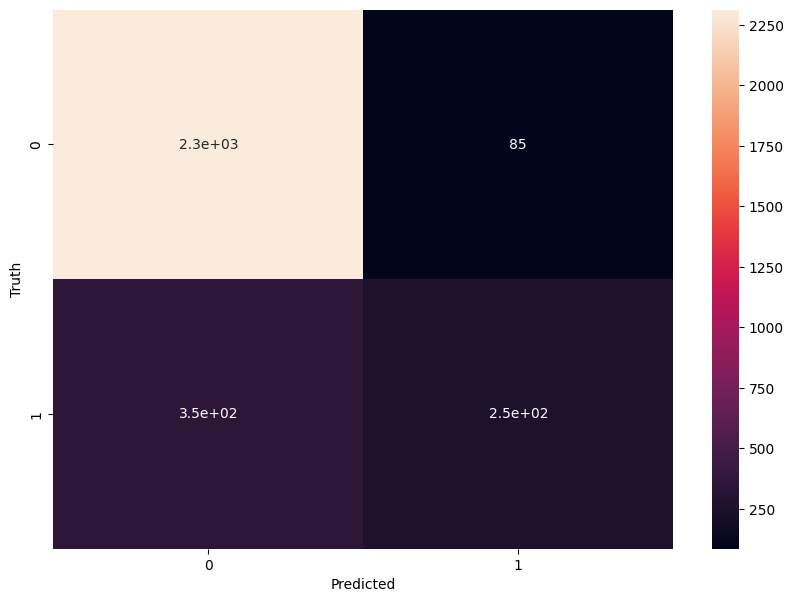

In [147]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2398
           1       0.75      0.42      0.54       602

    accuracy                           0.86      3000
   macro avg       0.81      0.69      0.73      3000
weighted avg       0.84      0.86      0.84      3000

